# Clustering

## K-Means Clustering

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import table
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [3]:
data1 = pd.read_csv("AirNow_Data_final.csv")
data2 = pd.read_csv("NOAA_Data_final.csv")

In [4]:
data2 = data2[~((data2['Date'] >= '2025-08-01') & (data2['Date'] <= '2025-12-01'))]
data2

,State-Code,Division,Date,cddc,hddc,pcpn,pdsi,phdi,pmdi,sp01,sp02,sp03,sp06,sp09,sp12,sp24,tmax,tmin,tmpc,zndx
0,5,1,1895-01-01,0.0,1209.0,0.69,0.71,0.71,0.71,0.87,NaN,NaN,NaN,NaN,NaN,NaN,38.3,13.8,26.0,2.14
1,5,1,1895-02-01,0.0,1179.0,0.95,1.59,1.59,1.59,1.13,1.30,NaN,NaN,NaN,NaN,NaN,37.1,8.8,22.9,2.85
2,5,1,1895-03-01,0.0,884.0,0.76,1.82,1.82,1.82,-0.24,0.40,0.64,NaN,NaN,NaN,NaN,52.0,21.1,36.5,1.17
3,5,1,1895-04-01,0.0,471.0,0.67,1.23,1.23,0.58,-0.87,-0.87,-0.40,NaN,NaN,NaN,NaN,65.7,33.0,49.3,-1.20
4,5,1,1895-05-01,7.0,279.0,2.73,1.93,1.93,1.93,0.74,0.09,-0.07,NaN,NaN,NaN,NaN,71.6,40.8,56.2,2.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7850,5,5,2025-03-01,0.0,989.0,1.00,1.41,1.41,0.26,-0.61,-1.10,-1.32,-0.31,0.28,0.77,-0.13,48.5,17.7,33.1,-0.67
7851,5,5,2025-04-01,0.0,786.0,1.04,0.90,0.90,-0.61,-0.39,-0.78,-1.14,-1.06,0.23,0.86,-0.04,54.2,23.3,38.8,-1.07
7852,5,5,2025-05-01,0.0,598.0,1.83,1.21,1.21,0.15,0.67,0.10,-0.30,-1.21,-0.15,0.80,-0.07,60.3,31.1,45.7,1.18
7853,5,5,2025-06-01,0.0,219.0,1.08,1.32,1.32,0.51,0.40,0.62,0.17,-0.68,-0.19,0.26,-0.03,73.9,41.8,57.8,0.72


In [5]:
data1['Date'] = pd.to_datetime(data1['Date'])
data1_monthly = (data1.set_index('Date').groupby('Division').resample('MS',level='Date').mean())
data1_monthly = data1_monthly.drop(columns='Division')
data1_monthly = data1_monthly.reset_index()
data1_monthly

,Division,Date,CO,NO2,OZONE,PM10,PM2.5,SO2
0,1,2019-01-01,NaN,NaN,37.661290,NaN,4.410000,NaN
1,1,2019-02-01,NaN,NaN,38.428571,NaN,6.533333,NaN
2,1,2019-03-01,NaN,NaN,44.290323,NaN,6.712903,NaN
3,1,2019-04-01,NaN,NaN,45.783333,NaN,3.613333,NaN
4,1,2019-05-01,NaN,NaN,47.870968,NaN,3.723333,NaN
...,...,...,...,...,...,...,...,...
239,5,2025-03-01,NaN,NaN,NaN,20.058065,3.838710,NaN
240,5,2025-04-01,NaN,NaN,NaN,21.343333,1.073333,NaN
241,5,2025-05-01,NaN,NaN,NaN,13.848387,3.751613,NaN
242,5,2025-06-01,NaN,NaN,NaN,19.383333,3.076667,NaN


In [6]:
data2['Date'] = pd.to_datetime(data2['Date'])
data1_monthly['Date'] = pd.to_datetime(data1_monthly['Date'])

merged_data = pd.merge(data2,data1_monthly,on=['Division','Date'],how='left')
merged_data

,State-Code,Division,Date,cddc,hddc,pcpn,pdsi,phdi,pmdi,sp01,...,tmax,tmin,tmpc,zndx,CO,NO2,OZONE,PM10,PM2.5,SO2
0,5,1,1895-01-01,0.0,1209.0,0.69,0.71,0.71,0.71,0.87,...,38.3,13.8,26.0,2.14,NaN,NaN,NaN,NaN,NaN,NaN
1,5,1,1895-02-01,0.0,1179.0,0.95,1.59,1.59,1.59,1.13,...,37.1,8.8,22.9,2.85,NaN,NaN,NaN,NaN,NaN,NaN
2,5,1,1895-03-01,0.0,884.0,0.76,1.82,1.82,1.82,-0.24,...,52.0,21.1,36.5,1.17,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1,1895-04-01,0.0,471.0,0.67,1.23,1.23,0.58,-0.87,...,65.7,33.0,49.3,-1.20,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1895-05-01,7.0,279.0,2.73,1.93,1.93,1.93,0.74,...,71.6,40.8,56.2,2.47,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,5,5,2025-03-01,0.0,989.0,1.00,1.41,1.41,0.26,-0.61,...,48.5,17.7,33.1,-0.67,NaN,NaN,NaN,20.058065,3.838710,NaN
7831,5,5,2025-04-01,0.0,786.0,1.04,0.90,0.90,-0.61,-0.39,...,54.2,23.3,38.8,-1.07,NaN,NaN,NaN,21.343333,1.073333,NaN
7832,5,5,2025-05-01,0.0,598.0,1.83,1.21,1.21,0.15,0.67,...,60.3,31.1,45.7,1.18,NaN,NaN,NaN,13.848387,3.751613,NaN
7833,5,5,2025-06-01,0.0,219.0,1.08,1.32,1.32,0.51,0.40,...,73.9,41.8,57.8,0.72,NaN,NaN,NaN,19.383333,3.076667,NaN


In [7]:
merged_data_reduced = merged_data[((merged_data['Date'] >= '2019-01-01') & (merged_data['Date'] <= '2025-07-01'))]
data_reduced_more = merged_data_reduced[merged_data_reduced['Division'].isin([1,2,4])].reset_index(drop=True)
data_reduced_more['Month'] = data_reduced_more['Date'].dt.month
for pol in ['PM2.5','OZONE']:
    data_reduced_more[pol] = data_reduced_more.groupby(['Division', 'Month'])[pol].transform(lambda x: x.fillna(x.mean()))
data_reduced_more.drop('Month',axis=1)
clustering_data = data_reduced_more[['Division','Date','tmpc','pcpn','pdsi','sp01','sp09','sp24','cddc','hddc','PM2.5','OZONE']]
clustering_data

,Division,Date,tmpc,pcpn,pdsi,sp01,sp09,sp24,cddc,hddc,PM2.5,OZONE
0,1,2019-01-01,30.6,0.87,1.42,1.37,0.04,0.85,0.0,1066.0,4.410000,37.661290
1,1,2019-02-01,29.8,0.62,1.48,0.40,0.47,0.94,0.0,986.0,6.533333,38.428571
2,1,2019-03-01,37.3,1.57,1.94,1.13,1.11,1.09,0.0,859.0,6.712903,44.290323
3,1,2019-04-01,49.3,0.70,1.20,-0.79,0.37,0.50,0.0,471.0,3.613333,45.783333
4,1,2019-05-01,52.3,2.49,1.63,0.54,0.73,0.24,0.0,394.0,3.723333,47.870968
...,...,...,...,...,...,...,...,...,...,...,...,...
232,4,2025-03-01,40.5,1.43,-1.11,0.39,-0.16,1.15,0.0,760.0,3.048387,30.512903
233,4,2025-04-01,43.8,0.83,-1.84,-1.79,-0.31,1.10,0.0,636.0,4.573333,35.663333
234,4,2025-05-01,52.4,2.83,-1.74,0.43,-0.36,0.61,0.0,391.0,3.900000,40.832258
235,4,2025-06-01,64.2,2.20,-1.68,0.49,0.03,0.01,70.0,94.0,5.520000,40.550000


In [8]:
clustering_data.to_csv('Clustering_Data_Final.csv',index=False, encoding='utf-8')

In [9]:
missing_by_division = clustering_data.groupby('Division')[['tmpc','pcpn','pdsi','sp01','sp09','sp24','cddc','hddc','PM2.5','OZONE']].apply(lambda x: x.isna().sum())
print(missing_by_division)

          tmpc  pcpn  pdsi  sp01  sp09  sp24  cddc  hddc  PM2.5  OZONE
Division                                                              
1            0     0     0     0     0     0     0     0      0      0
2            0     0     0     0     0     0     0     0      0      0
4            0     0     0     0     0     0     0     0      0      0


In [10]:
clustering_data_seasonal = clustering_data.copy()
clustering_data_seasonal['Year'] = clustering_data_seasonal['Date'].dt.year
clustering_data_seasonal['Month'] = clustering_data_seasonal['Date'].dt.month

divisions = [clustering_data_seasonal['Month'].isin([1, 2, 3]),
             clustering_data_seasonal['Month'].isin([4, 5, 6]),
             clustering_data_seasonal['Month'].isin([7, 8, 9]),
             clustering_data_seasonal['Month'].isin([10, 11, 12])]
season_choices = ['Winter', 'Spring', 'Summer', 'Autumn']
clustering_data_seasonal['Season'] = np.select(divisions, season_choices)

data_meta = clustering_data_seasonal[['Division','Year','Season']]
clustering_features =clustering_data_seasonal.drop(columns=['Division','Date','Year','Month','Season'])

clustering_features_final = StandardScaler().fit_transform(clustering_features)
clustering_data_final = pd.DataFrame(clustering_features_final,columns=clustering_features.columns)
seasonal_data_final = pd.concat([data_meta.reset_index(drop=True),clustering_data_final],axis=1)

### Clustering Seasonal Data

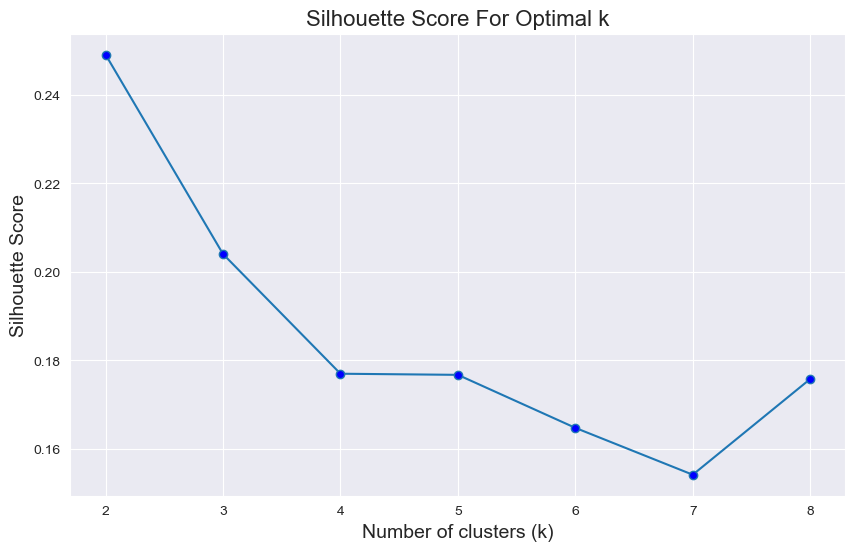

In [11]:
sil_score_values = []
for i in range(2,9):
    km = KMeans(n_clusters = i)
    sil_score_values.append(silhouette_score(clustering_data_final,km.fit_predict(clustering_data_final)))

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
plt.plot(range(2,9), sil_score_values, marker='o', markerfacecolor='blue')
plt.xlabel('Number of clusters (k)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Score For Optimal k', fontsize=16)
plt.show()

In [12]:
k_means = KMeans(n_clusters= 2, random_state= 1234)
seasonal_data_final['cluster'] = k_means.fit_predict(clustering_data_final)

cluster_profiles = seasonal_data_final.groupby('cluster').mean(numeric_only=True)
display(cluster_profiles)

,Division,Year,tmpc,pcpn,pdsi,sp01,sp09,sp24,cddc,hddc,PM2.5,OZONE
cluster,,,,,,,,,,,,
0,2.304348,2021.836957,1.09196,0.355497,0.006368,-0.044053,0.207453,0.055838,0.819948,-1.085080,0.321016,0.883653
1,2.351724,2021.793103,-0.69283,-0.225557,-0.004041,0.027951,-0.131625,-0.035428,-0.520243,0.688464,-0.203679,-0.560663


In [13]:
seasonal_data_final

,Division,Year,Season,tmpc,pcpn,pdsi,sp01,sp09,sp24,cddc,hddc,PM2.5,OZONE,cluster
0,1,2019,Winter,-1.004794,-0.631063,1.178181,1.516237,0.273854,1.534215,-0.520243,1.093413,-0.616818,-1.069775,1
1,1,2019,Winter,-1.054455,-0.921339,1.204353,0.478215,0.724427,1.639649,-0.520243,0.911864,0.195646,-0.971203,1
2,1,2019,Winter,-0.588884,0.181710,1.405005,1.259407,1.395047,1.815374,-0.520243,0.623654,0.264356,-0.218149,1
3,1,2019,Spring,0.156028,-0.828450,1.082217,-0.795234,0.619643,1.124191,-0.520243,-0.256860,-0.921652,-0.026343,1
4,1,2019,Spring,0.342257,1.249926,1.269783,0.628033,0.996866,0.819602,-0.520243,-0.431601,-0.879562,0.241854,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,4,2025,Winter,-0.390241,0.019156,0.074596,0.467514,0.064285,1.885663,-0.520243,0.398987,-1.137821,-1.988122,1
233,4,2025,Spring,-0.185390,-0.677507,-0.243830,-1.865360,-0.092891,1.827089,-0.520243,0.117586,-0.554321,-1.326450,1
234,4,2025,Spring,0.348464,1.644702,-0.200210,0.510319,-0.145283,1.253056,-0.520243,-0.438409,-0.811963,-0.662403,1
235,4,2025,Spring,1.080962,0.913206,-0.174038,0.574527,0.263376,0.550158,0.550447,-1.112411,-0.192092,-0.698665,0


In [14]:
seasonal_avg = (seasonal_data_final.groupby(['Season','Year'])['cluster'].mean().reset_index())

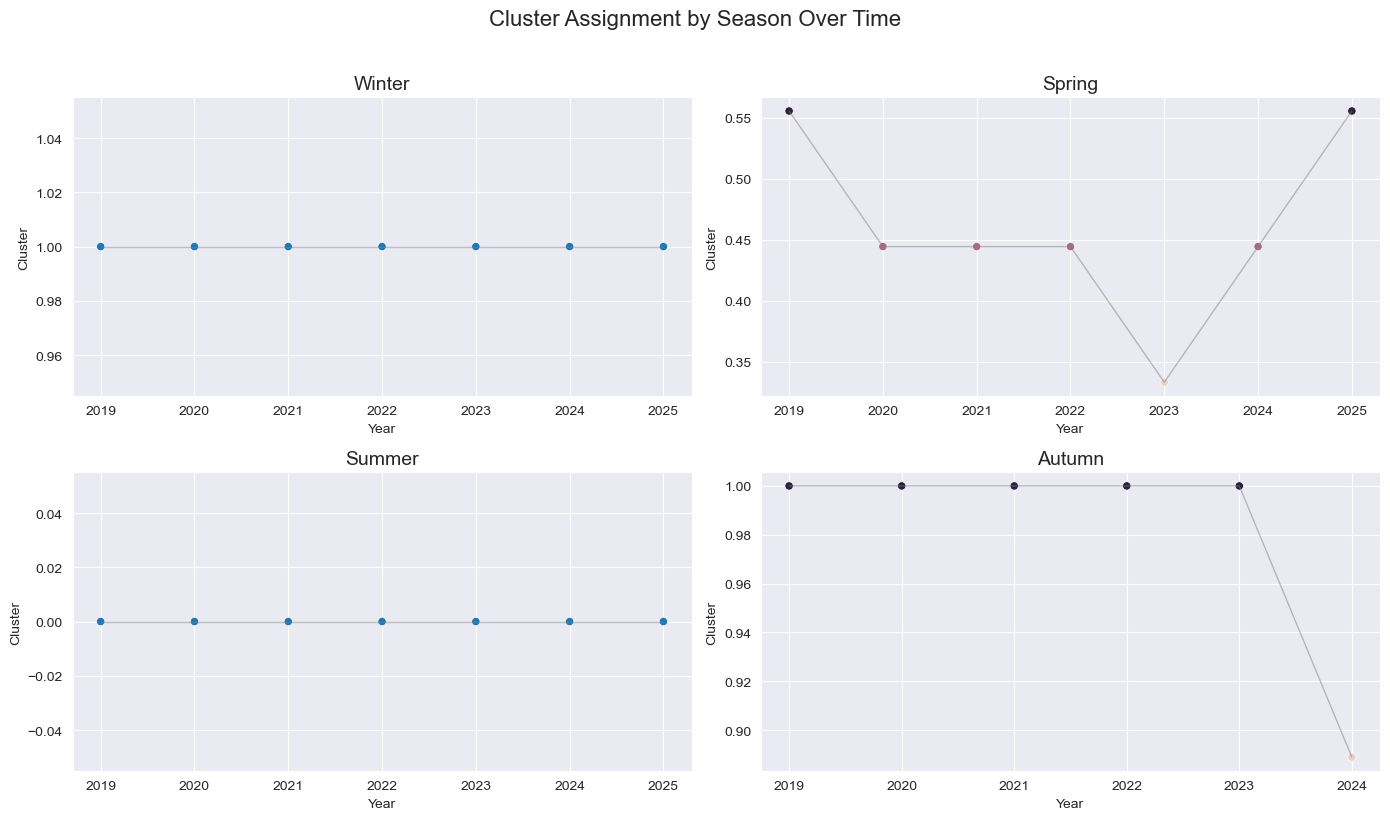

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

winter_data = seasonal_avg[seasonal_avg['Season'] == 'Winter'].sort_values('Year')
spring_data = seasonal_avg[seasonal_avg['Season'] == 'Spring'].sort_values('Year')
summer_data = seasonal_avg[seasonal_avg['Season'] == 'Summer'].sort_values('Year')
autumn_data = seasonal_avg[seasonal_avg['Season'] == 'Autumn'].sort_values('Year')

ax1 = axs[0,0]
sns.scatterplot(data=winter_data,x='Year',y='cluster',hue='cluster',ax=ax1,legend=False)
ax1.plot(winter_data['Year'],winter_data['cluster'],color='gray',alpha=0.5,linewidth=1)
ax1.set_title('Winter', fontsize=14)
ax1.set_ylabel("Cluster")
ax1.set_xlabel("Year")

ax2 = axs[0,1]
sns.scatterplot(data=spring_data,x='Year',y='cluster',hue='cluster',ax=ax2,legend=False)
ax2.plot(spring_data['Year'],spring_data['cluster'],color='gray',alpha=0.5,linewidth=1)
ax2.set_title('Spring', fontsize=14)
ax2.set_ylabel("Cluster")
ax2.set_xlabel("Year")

ax3 = axs[1,0]
sns.scatterplot(data=summer_data,x='Year',y='cluster',hue='cluster',ax=ax3,legend=False)
ax3.plot(summer_data['Year'],summer_data['cluster'],color='gray',alpha=0.5,linewidth=1)
ax3.set_title('Summer', fontsize=14)
ax3.set_ylabel("Cluster")
ax3.set_xlabel("Year")

ax4 = axs[1,1]
sns.scatterplot(data=autumn_data,x='Year',y='cluster',hue='cluster',ax=ax4,legend=False)
ax4.plot(autumn_data['Year'],autumn_data['cluster'],color='gray',alpha=0.5,linewidth=1)
ax4.set_title('Autumn', fontsize=14)
ax4.set_ylabel("Cluster")
ax4.set_xlabel("Year")

plt.suptitle("Cluster Assignment by Season Over Time", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Hierarchical Clustering

In [16]:
linkage_matrix = linkage(clustering_data_final, method='complete')

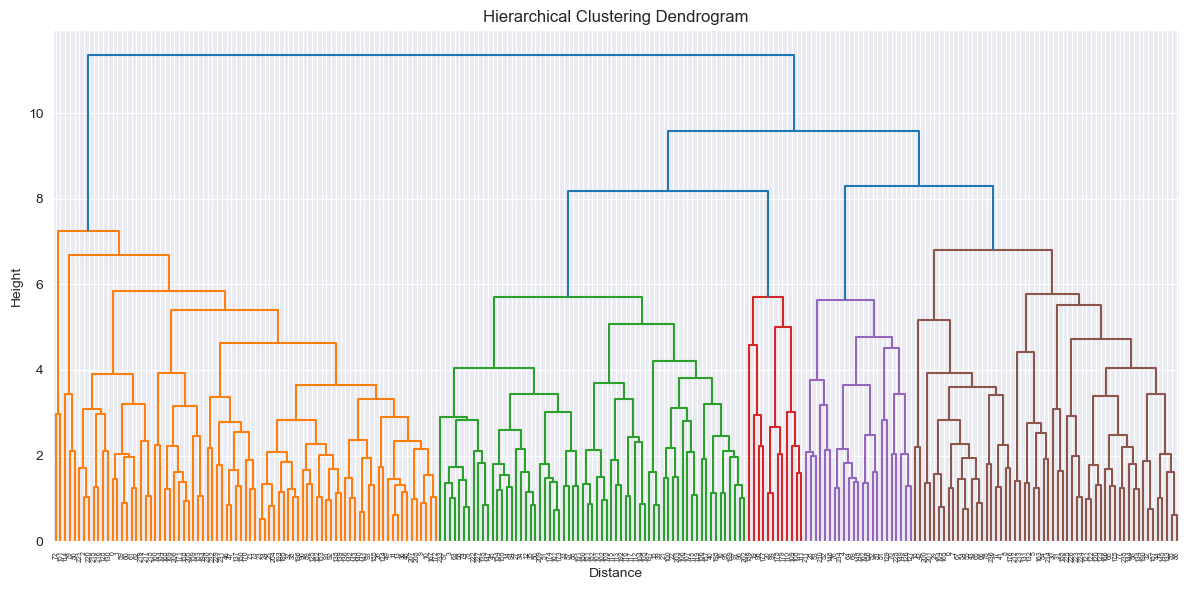

In [17]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

In [18]:
k = 5
labels = fcluster(linkage_matrix, k, criterion='maxclust')
seasonal_data_final['cluster'] = labels

In [19]:
hier_cluster_profiles = seasonal_data_final.groupby('cluster').mean(numeric_only=True)
display(hier_cluster_profiles)

,Division,Year,tmpc,pcpn,pdsi,sp01,sp09,sp24,cddc,hddc,PM2.5,OZONE
cluster,,,,,,,,,,,,
1,2.481481,2021.950617,-0.940572,-0.216792,0.322368,0.407534,0.038671,0.212305,-0.520243,0.952012,-0.158548,-0.799013
2,2.200000,2021.615385,-0.086928,-0.568184,-0.701370,-0.810545,-0.591181,-0.483822,-0.438588,0.039415,-0.254951,-0.092296
3,2.500000,2020.416667,1.003367,-0.368847,-1.360865,-0.616880,-1.171297,-0.970834,0.593785,-1.020880,2.492974,1.050043
4,2.173913,2022.391304,-0.018055,1.852186,0.854255,1.359906,0.853813,0.496167,-0.409184,-0.019168,-0.191450,0.089486
5,2.303571,2021.892857,1.253777,0.291393,0.288567,-0.075002,0.530576,0.258749,1.302388,-1.196134,0.069675,1.001082


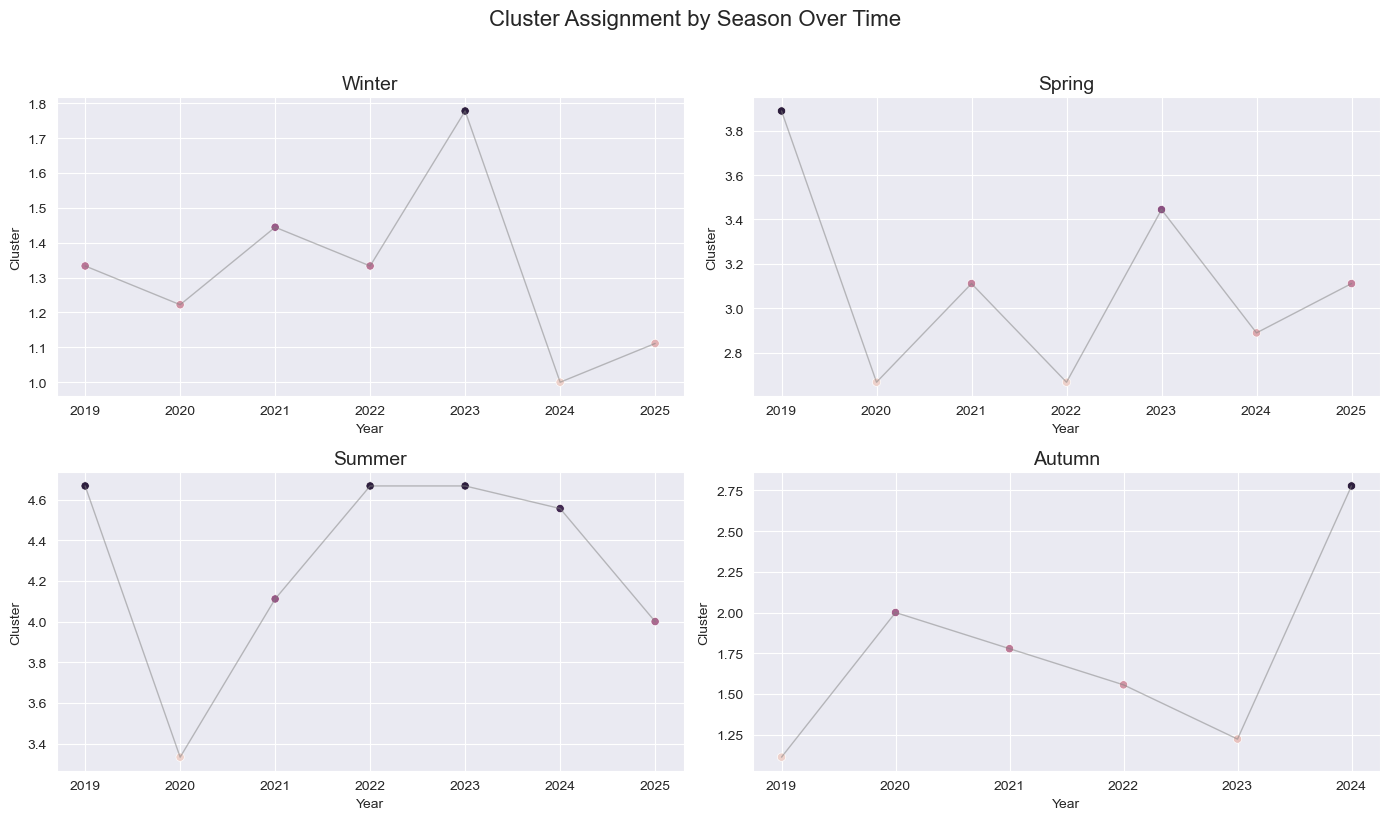

In [20]:
seasonal_avg = (seasonal_data_final.groupby(['Season','Year'])['cluster'].mean().reset_index())

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

winter_data = seasonal_avg[seasonal_avg['Season'] == 'Winter'].sort_values('Year')
spring_data = seasonal_avg[seasonal_avg['Season'] == 'Spring'].sort_values('Year')
summer_data = seasonal_avg[seasonal_avg['Season'] == 'Summer'].sort_values('Year')
autumn_data = seasonal_avg[seasonal_avg['Season'] == 'Autumn'].sort_values('Year')

ax1 = axs[0,0]
sns.scatterplot(data=winter_data,x='Year',y='cluster',hue='cluster',ax=ax1,legend=False)
ax1.plot(winter_data['Year'],winter_data['cluster'],color='gray',alpha=0.5,linewidth=1)
ax1.set_title('Winter', fontsize=14)
ax1.set_ylabel("Cluster")
ax1.set_xlabel("Year")

ax2 = axs[0,1]
sns.scatterplot(data=spring_data,x='Year',y='cluster',hue='cluster',ax=ax2,legend=False)
ax2.plot(spring_data['Year'],spring_data['cluster'],color='gray',alpha=0.5,linewidth=1)
ax2.set_title('Spring', fontsize=14)
ax2.set_ylabel("Cluster")
ax2.set_xlabel("Year")

ax3 = axs[1,0]
sns.scatterplot(data=summer_data,x='Year',y='cluster',hue='cluster',ax=ax3,legend=False)
ax3.plot(summer_data['Year'],summer_data['cluster'],color='gray',alpha=0.5,linewidth=1)
ax3.set_title('Summer', fontsize=14)
ax3.set_ylabel("Cluster")
ax3.set_xlabel("Year")

ax4 = axs[1,1]
sns.scatterplot(data=autumn_data,x='Year',y='cluster',hue='cluster',ax=ax4,legend=False)
ax4.plot(autumn_data['Year'],autumn_data['cluster'],color='gray',alpha=0.5,linewidth=1)
ax4.set_title('Autumn', fontsize=14)
ax4.set_ylabel("Cluster")
ax4.set_xlabel("Year")

plt.suptitle("Cluster Assignment by Season Over Time", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

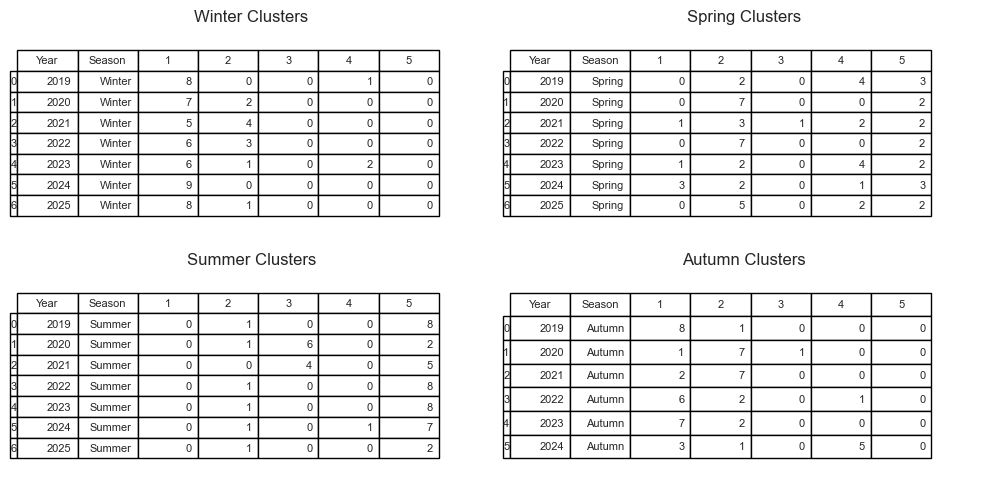

In [53]:
cluster_by_season = (seasonal_data_final.groupby(['Year','Season','cluster']).size().unstack(fill_value=0).reset_index())
winter_table = cluster_by_season[cluster_by_season['Season']=='Winter'].reset_index(drop=True)
spring_table = cluster_by_season[cluster_by_season['Season']=='Spring'].reset_index(drop=True)
summer_table = cluster_by_season[cluster_by_season['Season']=='Summer'].reset_index(drop=True)
autumn_table = cluster_by_season[cluster_by_season['Season']=='Autumn'].reset_index(drop=True)

fig, axes = plt.subplots(2, 2, figsize=(10,5))

table(axes[0,0],winter_table,bbox=[0,0.1,0.9,0.8])
axes[0,0].set_title('Winter Clusters')
axes[0,0].axis('off')

table(axes[0,1],spring_table,bbox=[0,0.1,0.9,0.8])
axes[0,1].set_title('Spring Clusters')
axes[0,1].axis('off')

table(axes[1,0],summer_table,bbox=[0,0.1,0.9,0.8])
axes[1,0].set_title('Summer Clusters')
axes[1,0].axis('off')

table(axes[1,1],autumn_table,bbox=[0,0.1,0.9,0.8])
axes[1,1].set_title('Autumn Clusters')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()